<br />

<div style="text-align: center;">
<font size="4">2022年度　PAGS・DDBJ合同 中級者情報解析講習会 (12/15–16 @オンライン)</font>
</div>
<br />
<br />
<div style="text-align: center;">
<font size="7">6 統計的仮説検定</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">遺伝研　森宙史</font>
</div>

<br />



In [8]:
#必要なモジュールのインポート
import numpy as np #numpy
import scipy as sp #scipy
import pandas as pd #pandas
import statistics
import statsmodels.stats.multitest as multi
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt #matplotlib
import seaborn as sns #seaborn
sns.set() #seaborn
%matplotlib inline

# 母集団と標本（サンプル）
- 母集団: 調べたい対象の全体<br />
（例）酵母のある条件でのmRNA全部<br />
- 標本: 母集団から無作為（ランダム）にN個抽出した集合<br />
（例）酵母のある条件でのmRNAをcDNA化して断片化してHiSeqでN read pairsシーケンシングした結果<br />
- サンプリング: 母集団から標本を得ること<br />
（例）RNA抽出してcDNA化してシーケンシング<br />
- サンプルサイズ: 標本の大きさ（N）<br />
（例）N read pairs<br />
- サンプル数: 標本を抽出した数<br />
（例）3 biological replicates<br />

# 標本データの尺度水準
- 名義尺度　カテゴリのみ　（例）A, B, C
- 順序尺度　カテゴリと順位　（例）大, 中, 小
- 間隔尺度と比率尺度　（例）定量的な数値データ（今回のデータ）

# 確率変数と確率分布
- 確率変数　とりうる値とその確率が決まっているもの　（例）コインの裏表
- 確率分布　確率変数とそれに付与された確率との対応を表したもの　（例）コインの裏表の確率分布　(裏) 0 = 1/2, (表) 1 = 1/2<br />

# 確率密度関数
名義尺度や順序尺度のデータは、離散値であるため、コインの裏の確率等、確率変数の各値の確率を計算することは容易。<br />
間隔尺度や比率尺度のデータは、連続値であるため、確率変数の各値の確率を計算することは困難。<br />
例えば、4 mmはもっと測定精度を上げると、4.1 mmや、4.001 mmかもしれず、4ちょうどになる確率に意味はほとんどない。<br />
したがって、4-5 mmの間等、ある程度間隔をとって確率変数の値がその間の値になる確率を表現する。<br />
実際は、区間で積分して密度として求めるので、間隔尺度や比率尺度の場合の確率を確率密度と呼び、連続型の確率変数の確率分布を、確率密度関数と呼ぶ。<br />

# 様々な確率分布
推測統計学では、母集団に仮定を置くことで推定を簡単にする。<br />
母集団の推定は、分布の形を推定する（何分布か）ことと、確率分布のパラメータを推定することの二つによって、構成される。<br />
母集団の分布<br />

- 二項分布<br />
とりうる値が2値のみであり、かつ毎回の試行で得られる値が独立である試行をベルヌーイ試行と呼ぶ<br />
ベルヌーイ試行をN回行った場合の一方の値が観察される確率分布<br />
0以上の整数のみ<br />
<br />
- ポアソン分布<br />
カウントデータが従う離散型の確率分布<br />
0以上の整数のみ<br />
統計量λによって分布が決定される<br />
<br />
- 正規分布<br />
マイナス無限からプラス無限までの実数値をとる<br />
平均値に近いほど確率密度が大きい<br />
確率密度の大きさは、平均値を中心に左右対称<br />
平均値と分散が正規分布において確率分布を特徴付けるパラメータ<br />

Text(0, 0.5, 'frequency')

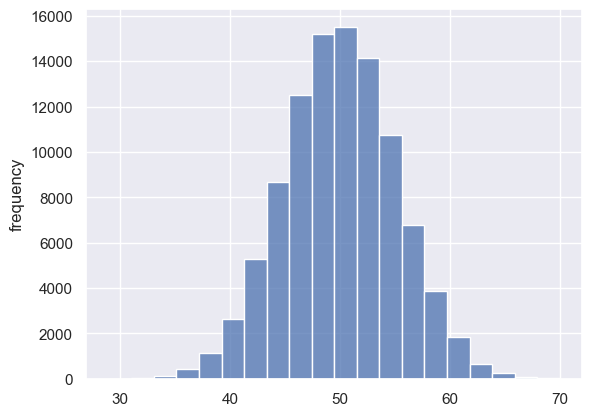

In [77]:
rand_binomial = np.random.binomial(100, 0.5, size=100000) #2値のどちらも生じる確率が0.5の二項分布に従う乱数を100回発生させてカウントする試行を100000回繰り返す
sns.histplot(rand_binomial, bins=20)
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

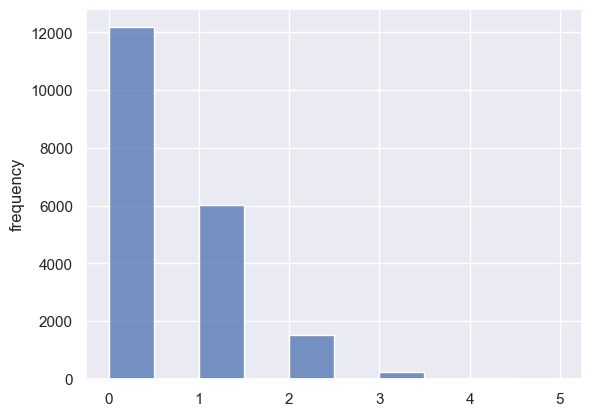

In [78]:
rand_poisson = np.random.poisson(lam=0.5, size=20000) 
sns.histplot(rand_poisson, bins=10)
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

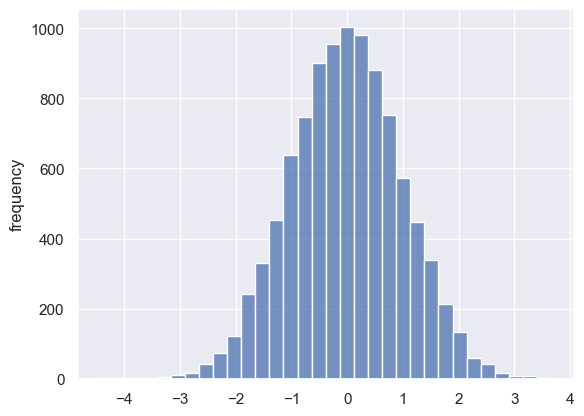

In [79]:
randn = np.random.randn(10000) #標準正規分布（平均=0, 分散=1）に従う乱数発生
sns.histplot(randn, bins=32)
plt.ylabel('frequency')

# 統計的仮説検定について
標本のデータを用いて母集団について議論するのが、推測統計学の目的<br />
推測統計学で扱う対象: 点推定・区間推定・統計的仮説検定<br />
標本から母集団を推定する都合上、必ず推定誤差が生じる。<br />
推定誤差がある前提で、「検証したい仮説」がある場合に、統計的仮説検定を行う。<br />
統計的仮説検定は、標本を使って、母集団に関する統計的な判断を下す方法。<br />

# 帰無仮説と対立仮説
検定の論理は、反証法（背理法）。差があることを証明するために、差がないとするには矛盾があることを証明する。<br />
- 帰無仮説: 棄却される対象になる仮説<br />
- 対立仮説: 実際に検証したい仮説<br />
帰無仮説が棄却できなくても、帰無仮説が正しいことが証明されたわけではない。差がないとは断言できず、「差があるとは言えない」とする。<br />

# p値
- p値:　標本が帰無仮説に従っていると考えた場合に、標本から計算した統計量よりも極端な値が得られる確率。標本が帰無仮説に従っていると考えることにどの程度矛盾があるのかの目安となる指標。
- 有意水準（危険率）:　帰無仮説を棄却する基準となる値であり、α=0.05等、αで表す。検定を行う前に決めておく。<br />
どの程度p値が偏っていれば偶然では起こりにくい（有意）と考えるか。<br />
実際は、帰無仮説が正しいのに、それを誤って棄却する確率（Type 1 error)。<br />
逆に通常の検定では、帰無仮説が間違っているのに、誤って帰無仮説を採択してしまう確率（Type 2 error)は評価しない。<br />

# 片側検定と両側検定
通常は、違いがあるとする場合、大きいまたは小さいの2通り（両側）。
想定する仮説が、何らかの根拠を持って必ず大きい側または小さい側に偏ると考えられる場合のみ、片側検定を使う。<br /><br />


# 検定の使い分け
- パラメトリック検定: 母集団の分布について一定の仮定をおき、それに基づいて統計的仮説検定を行うもの
- ノンパラメトリック検定: 母集団の分布について特別の仮定をおく必要がないもの<br />
分布に仮定をおくという概念は間隔尺度および比率尺度に固有のものである。<br />
そもそも、名義尺度や順序尺度のデータに対する検定は、全てノンパラメトリック検定になる。<br />
<br />
<br />
<div style="text-align: center;">
<font size="5">大まかな検定の区分</font>
<br />
（検定手法は他にもたくさんあります）
</div>

データ形式 | 尺度水準 | 検定手法
------ | ------ | ------  
1群 | 名義尺度 | 二項検定、カイ二乗適合度検定
1群 | 間隔・比尺度 | 平均値の検定
独立2群 | 名義尺度 | カイ二乗独立性の検定、Fisherの正確確率検定、比率の差の検定
独立2群 | 順序尺度 | Mann–WhitneyのU検定（Wilcoxonの順位和検定）
独立2群 | 間隔・比尺度 | t検定、等分散の検定（F検定）
関連2群 | 名義尺度 | 符号検定
関連2群 | 順序尺度 | Wilcoxonの符号順位検定
関連2群 | 間隔・比尺度 | 対応のあるt検定（paired t検定）
独立多群 | 名義尺度 | カイ二乗独立性の検定
独立多群 | 順序尺度 | Kruskal–Wallis検定
独立多群 | 間隔・比尺度 | 一元配置分散分析
関連多群 | 名義尺度 | カイ二乗独立性の検定
関連多群 | 順序尺度 | Friedman検定
関連多群 | 間隔・比尺度 | 二元配置分散分析
<br />

それでは、実際に検定を行っていく。<br />

In [31]:
#　カレントディレクトリにinput/があるか確認
%ls

DispersionPlot.html                     StatisticalHypothesisTesting2022.ipynb
MAPlotRes.html                          input/


In [32]:
#　データを読み込む
rawtag = pd.read_csv("input/count_raw.tsv", sep='\t')
tpm = pd.read_csv("input/count_tpm.tsv", sep='\t')

In [33]:
# 中身を少し見てみる
rawtag.head()

,gene_id,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,gene_0001,0,2,6,0,0,1
1,gene_0002,0,0,0,0,0,0
2,gene_0003,0,0,0,0,0,0
3,gene_0004,0,0,0,0,0,0
4,gene_0005,2,8,10,6,7,18


In [34]:
# 中身を少し見てみる
tpm.head()

,gene_id,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,gene_0001,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810
1,gene_0002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,gene_0003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,gene_0004,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,gene_0005,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291


In [35]:
# 中身を要約する
rawtag.describe()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,762.996490,1045.147418,756.142403,513.784891,646.752131,819.398964
std,2340.621813,3317.458482,2480.278261,1231.551981,1778.429371,2218.882875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,156.000000,109.000000,121.000000,144.000000,184.000000
50%,287.000000,376.000000,266.000000,237.000000,285.000000,364.000000
75%,602.000000,816.000000,580.000000,467.500000,569.000000,730.500000
max,72079.000000,102148.000000,76964.000000,34808.000000,52707.000000,65855.000000


In [36]:
# 中身を要約する
tpm.describe()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,167.140231,167.140231,167.140231,167.140231,167.140231,167.140231
std,676.764751,718.557714,660.514608,518.206747,588.978425,592.809952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.142105,17.065011,17.179998,27.690041,26.786171,25.795361
50%,38.074356,36.870840,36.978465,52.769183,50.497338,49.894817
75%,89.884201,87.009136,88.036030,119.126766,113.792307,113.755712
max,21341.957332,25472.407296,18882.116608,13693.378889,19157.473199,19225.835800


# TPMとは
TPM (Transcripts Per Million)は、RPKM/FPKMに代わって最近よく使われるようになった、データの補正方法である。<br />
RPKM/FPKMと比べて、[サンプル間の補正が正確。](https://www.ncbi.nlm.nih.gov/pubmed/22872506)<br />
RPKM/FPKMはマップされた全リード数を重要視しているが、残念ながら、全リード数は実験に用いたmRNA全体の個数とは比例しない。（詳しくは、[このWebサイト](https://bi.biopapyrus.jp/rnaseq/analysis/normalizaiton/fpkm.html)）<br />
長いmRNAからはリードがたくさんシーケンスされるため、発現しているmRNA全体の長さの分布によって、同じ個数のmRNAから得られる全リード数は異なる。<br />
同じN個のmRNAをRNA-seq実験に使ったサンプル間であっても、長い遺伝子が多く発現しているサンプルでは全リード数が多く、短い遺伝子が多く発現していたら全リード数は少なくなる。真に補正すべきは実験に用いたmRNA全体の個数なのに、全リード数で補正するとずれてしまう。<br />
TPMでは、全リード数で割り算するのではなく、まず各遺伝子の長さでマップされたリード数を調整した値を計算し、その和で補正する。<br />

<AxesSubplot:xlabel='batch_1', ylabel='Count'>

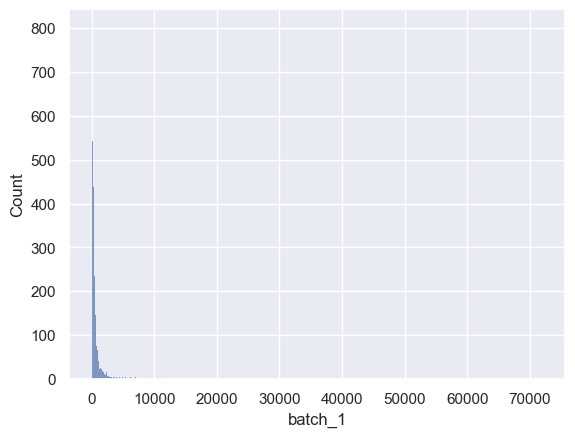

In [76]:
# データの分布を図示
sns.histplot(rawtag.batch_1)

<AxesSubplot:xlabel='batch_1', ylabel='Count'>

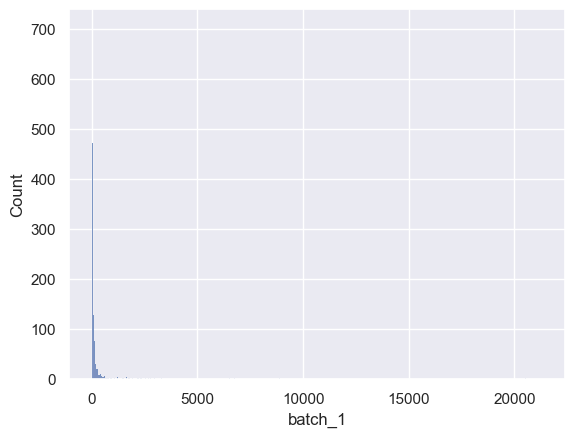

In [80]:
# データの分布を図示
sns.histplot(tpm.batch_1)

rawtagもtpmも正規分布というよりはポアソン分布に近そう。

Text(0, 0.5, 'tpm.batch_2')

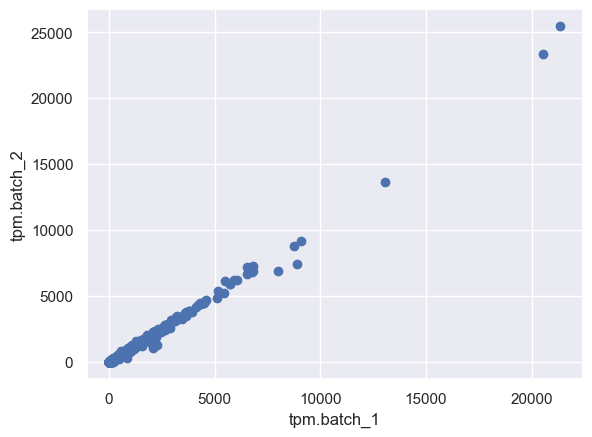

In [81]:
# サンプル間の対応関係を散布図で見てみる
plt.scatter(tpm.batch_1, tpm.batch_2)
plt.xlabel('tpm.batch_1')
plt.ylabel('tpm.batch_2')

Text(0, 0.5, 'tpm.chemostat_1')

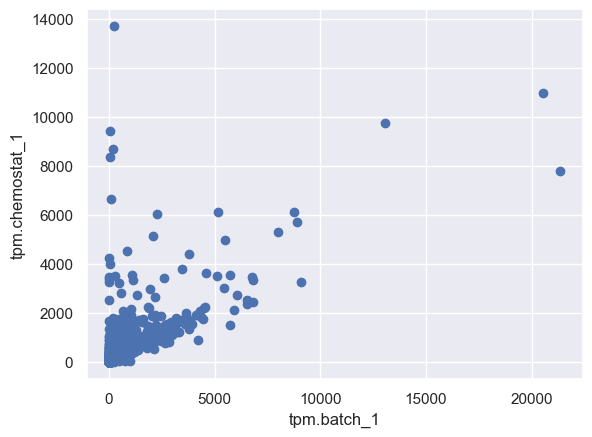

In [71]:
# サンプル間の対応関係を散布図で見てみる
plt.scatter(tpm.batch_1, tpm.chemostat_1)
plt.xlabel('tpm.batch_1')
plt.ylabel('tpm.chemostat_1')

batchとchemostatは違いがあるかも?

<AxesSubplot:>

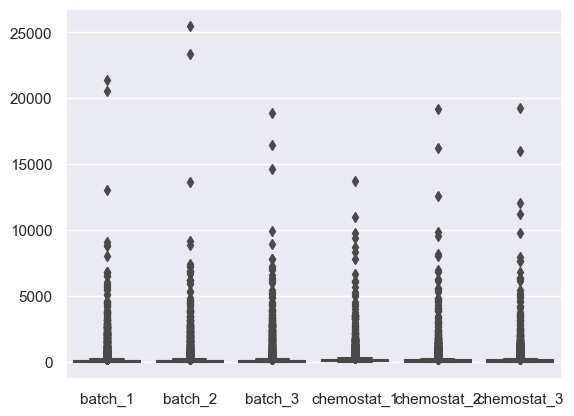

In [74]:
sns.boxplot(tpm)

<AxesSubplot:>

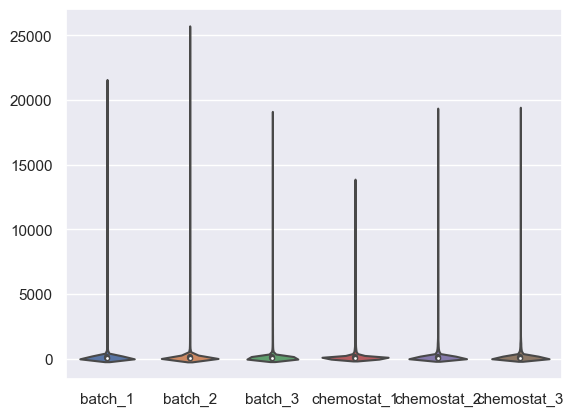

In [75]:
sns.violinplot(tpm)

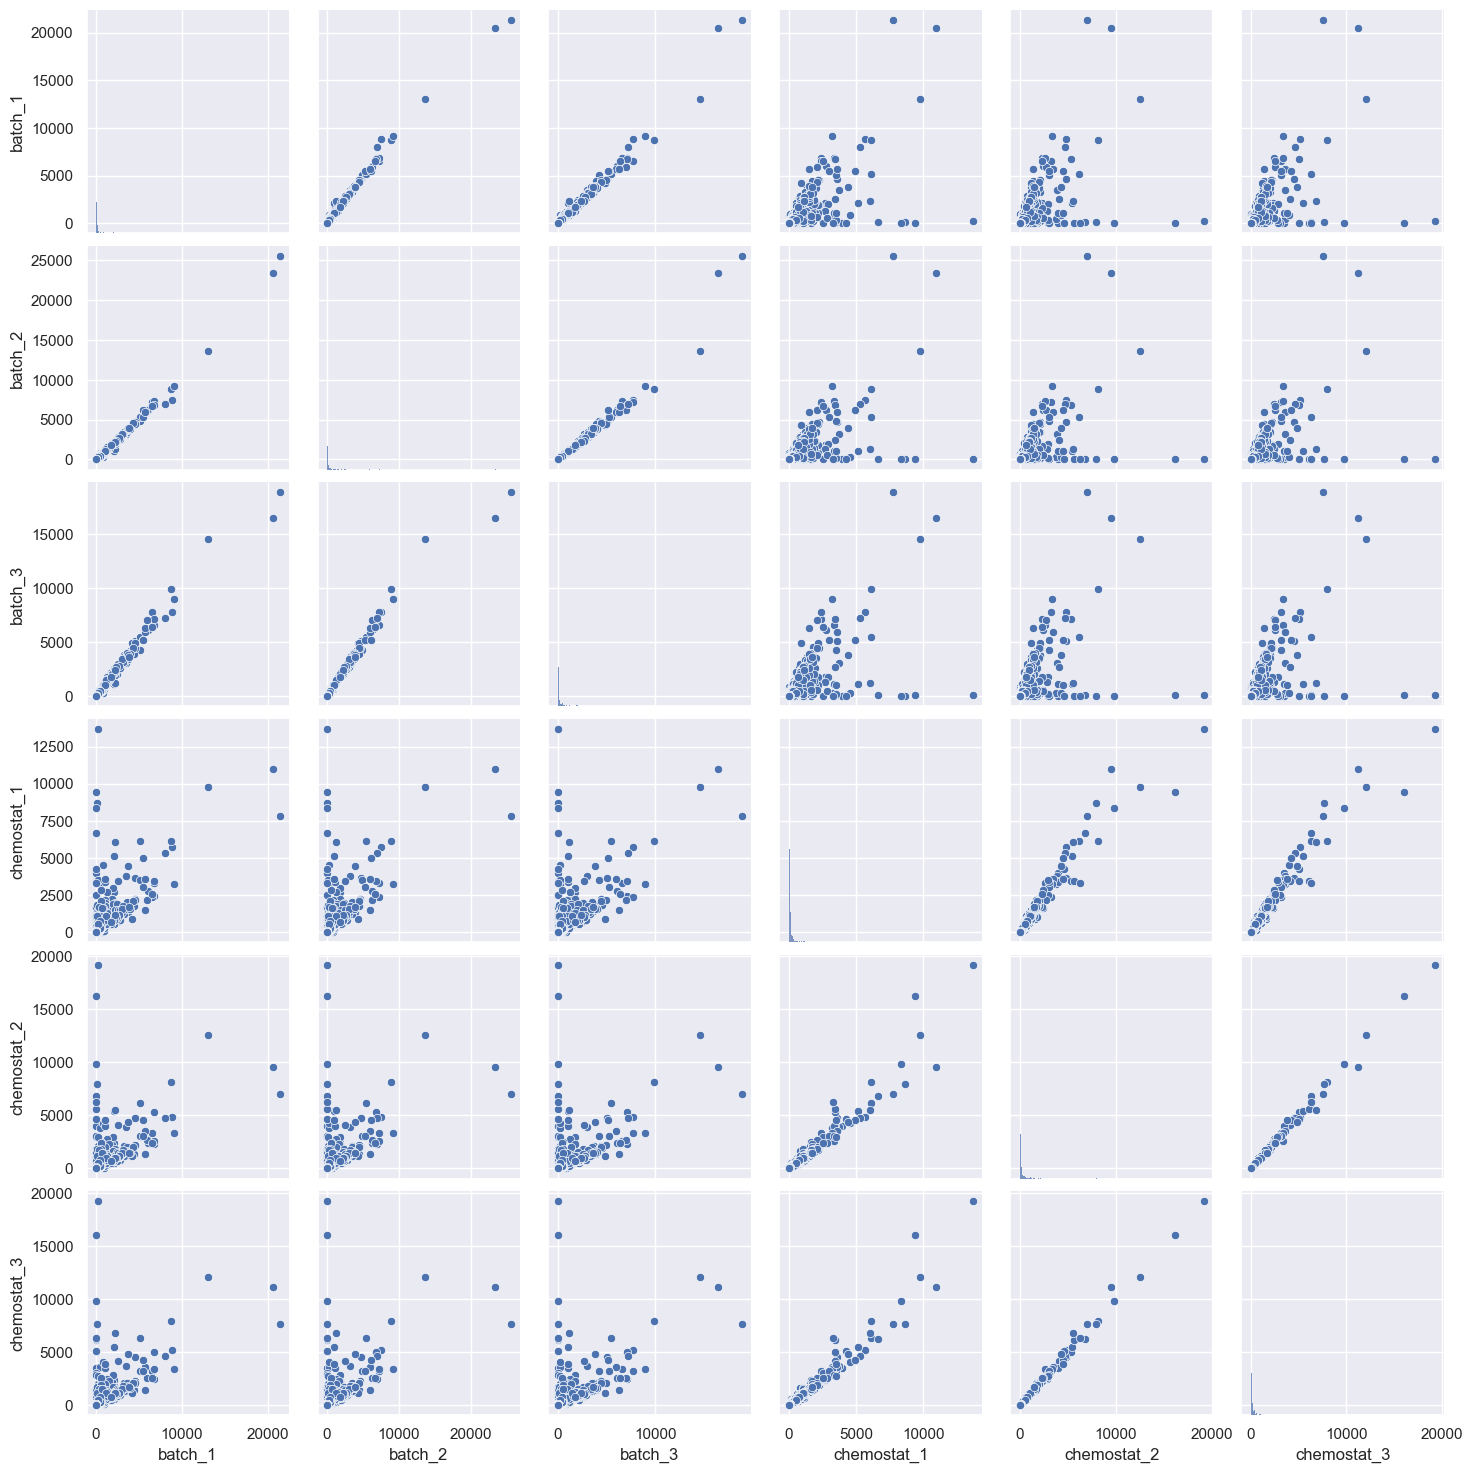

In [42]:
# 全組み合わせの散布図を表示
sns.pairplot(tpm)

# 相関係数について
サンプル間の遺伝子発現パターンの関連の度合いを、より定量的に評価したい場合には、相関係数が便利である。 <br />
相関係数には、代表的な統計量として、Pearson相関係数とSpearman相関係数がある。 <br />
Pearson相関係数は、変数の母集団の分布に正規分布を仮定しており、間隔尺度として変数の値の大小を相関係数の計算に使用できるが、外れ値の影響も強く受ける。そのため、今回のデータでは使用すべきではない。 <br />
今回は、データを順位尺度に直して計算を行うためノンパラメトリックな統計手法である、Spearman相関係数を用いる。<br />

In [43]:
# Spearman相関係数を計算してみる
corr, p = stats.spearmanr(tpm.batch_1, tpm.batch_2)
print("Spearman correlation:" + str(corr))
print("p value:" + str(p))

Spearman correlation:0.9902256194881663
p value:0.0


In [45]:
# Spearman相関係数を計算してみる
corr, p = stats.spearmanr(tpm.batch_1, tpm.chemostat_1)
print("Spearman correlation:" + str(corr))
print("p value:" + str(p))

Spearman correlation:0.829813969825131
p value:0.0


一応、Pearson相関係数も計算してみる。 <br />

In [46]:
pcorr, pp = stats.pearsonr(tpm.batch_1, tpm.batch_2)
print("Pearson correlation:" + str(pcorr))
print("p value:" + str(pp))

Pearson correlation:0.9954680070131612
p value:0.0


In [47]:
pcorr, pp = stats.pearsonr(tpm.batch_1, tpm.chemostat_1)
print("Pearson correlation:" + str(pcorr))
print("p value:" + str(pp))

Pearson correlation:0.6939208446236318
p value:0.0


Text(0, 0.5, 'tpm.chemostat_1')

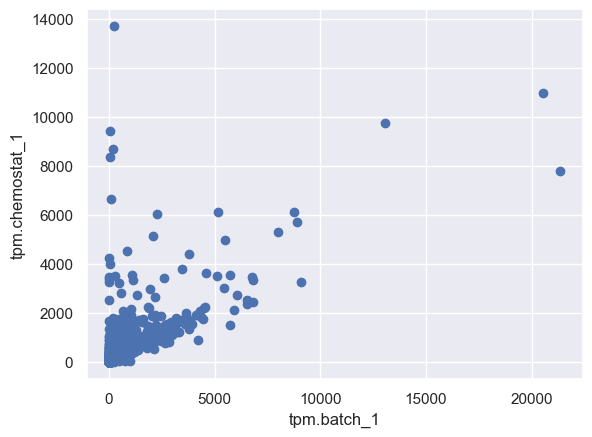

In [72]:
plt.scatter(tpm.batch_1, tpm.chemostat_1)
plt.xlabel('tpm.batch_1')
plt.ylabel('tpm.chemostat_1')

上記のtpm.batch_1とtpm.chemostat_1の散布図を見ればわかるように、外れ値がいくつか存在する。<br />
これらの少数の外れ値が影響して、Pearson相関係数の場合はSpearman相関係数と比べて、相関係数の絶対値が小さくなった可能性がある。<br />

遺伝子ごとの発現パターンは、batchとchemostat間でもかなり似ている。<br />
しかしながら、相関係数の有意性の検定は、あくまで、相関係数が0であるか否かの検定であり、有意であるとなっても、相関係数が0では無いというだけである。<br /><br />
# 群間の全体像の検定
では、batchとchemostat間で全体的な遺伝子発現量が異なるのかを検定してみる。<br />
今回は母集団の遺伝子発現量の分布が正規分布しているとは仮定しにくいので、パラメトリックなt検定ではなく、ノンパラメトリックなMann-Whitney U検定を用いる。<br />
なお、Mann-Whitney U検定は、母集団の分布が正規分布している必要は無いが、サンプルが由来した母集団が同じようなバラツキ具合であることを仮定しているため、同じようなバラツキ具合とは考えにくい場合には、精度が悪くなる。その場合は、Brunner-Munzel 検定等を用いる。<br />

In [49]:
# Mann–Whitney U検定でbatchとchemostat間で全体的な遺伝子発現量に違いがあるかを検定してみる
b1c1 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_1, alternative="two-sided") #alternative="two-sided"を指定しないと片側検定になってしまう
b1c2 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_2, alternative="two-sided")
b1c3 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_3, alternative="two-sided")
b2c1 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_1, alternative="two-sided")
b2c2 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_2, alternative="two-sided")
b2c3 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_3, alternative="two-sided")
b3c1 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_1, alternative="two-sided")
b3c2 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_2, alternative="two-sided")
b3c3 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_3, alternative="two-sided")
print(b1c1.pvalue, b1c2.pvalue, b1c3.pvalue, "\n", b2c1.pvalue, b2c2.pvalue, b2c3.pvalue, "\n", b3c1.pvalue, b3c2.pvalue, b3c3.pvalue)

2.373266014417827e-50 2.215090356253741e-40 2.5317567730972835e-34 
 4.7548489789412765e-61 3.370421389404864e-50 1.873949852344719e-43 
 4.821954363313383e-58 1.9103585097077315e-47 6.490854138298023e-41


一応、replicate間でも発現量の全体像の検定をしてみる。

In [50]:
b1b2 = stats.mannwhitneyu(tpm.batch_1, tpm.batch_2, alternative="two-sided") #alternative="two-sided"を指定しないと片側検定になってしまう
b1b3 = stats.mannwhitneyu(tpm.batch_1, tpm.batch_3, alternative="two-sided")
b2b3 = stats.mannwhitneyu(tpm.batch_2, tpm.batch_3, alternative="two-sided")
c1c2 = stats.mannwhitneyu(tpm.chemostat_1, tpm.chemostat_2, alternative="two-sided")
c1c3 = stats.mannwhitneyu(tpm.chemostat_1, tpm.chemostat_3, alternative="two-sided")
c2c3 = stats.mannwhitneyu(tpm.chemostat_2, tpm.chemostat_3, alternative="two-sided")
print(b1b2.pvalue, b1b3.pvalue, b2b3.pvalue, "\n", c1c2.pvalue, c1c3.pvalue, c2c3.pvalue)

0.0826733856233017 0.1743603024166338 0.7087270971636007 
 0.06277168614779548 0.004897646243876946 0.31552031828944893


c1 vs c3は p < 0.05になる。散布図を見てみる。

Text(0, 0.5, 'tpm.chemostat_2')

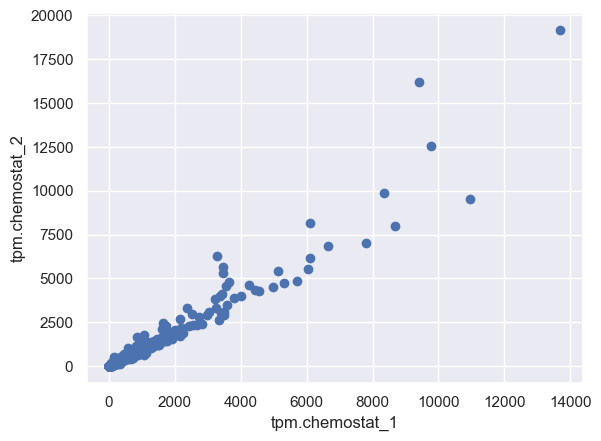

In [73]:
plt.scatter(tpm.chemostat_1, tpm.chemostat_2)
plt.xlabel('tpm.chemostat_1')
plt.ylabel('tpm.chemostat_2')

この程度の違いでも、p値は0.0048になる。はたしてこれらをreplicateと考えて良いかどうか？　このような違いでも有意差があるとする検定手法をこの比較解析で使うべきなのか？　考える必要がある。

# 群間の各カテゴリ（変数）の検定
全体像はわかったので、<br />次に、batchとchemostat間で各遺伝子がどの程度発現量が有意に異なるのかを検定する。<br />
検定には、とりあえず下記のような分割表の検定である、カイ二乗独立性の検定を用いてみる。

データ | 群1 | 群2
------ | ------ | ------  
遺伝子1 | 50 | 100
それ以外の遺伝子の合計|12,000,000 | 13,000,000


In [52]:
# カイ二乗独立性の検定でとりあえず最初の10遺伝子を検定してみる
# カイ二乗独立性の検定はカウントデータを使うので、rawtagを使う
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3) #batch 3 replicateのタグカウントの合計を計算
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3) #chemostat 3 replicateのタグカウントの合計を計算
ar = []
for i in range(10): #最初の10遺伝子でとりあえず検定
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i] #i番目の遺伝子のbatch 3 replicateでのタグカウントの合計を計算
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i] #i番目の遺伝子のchemostat 3 replicateでのタグカウントの合計を計算
    sxr = sx - x #i番目の遺伝子以外の全遺伝子の、batch 3 replicateでのタグカウントの合計を計算
    syr = sy - y #i番目の遺伝子以外の全遺伝子の、chemostat 3 replicateでのタグカウントの合計を計算
    if ( rawtag.batch_1[i] == 0 or rawtag.batch_2[i] == 0 or rawtag.batch_3[i] == 0 or rawtag.chemostat_1[i] == 0 or rawtag.chemostat_2[i] == 0 or rawtag.chemostat_3[i] == 0):
        ar.append(1)
        #カイ二乗独立性の検定では、各値のどれかが0だと検定で仮定しているモデルからデータが大きく逸脱してしまい検定の精度が悪くなるため、
        #そのようなデータの場合には検定をせずにp値を1とする
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
print(ar)

[1, 1, 1, 1, 0.01938602578323846, 1, 1, 1, 1.986085272704651e-13, 0.0]


In [53]:
rawtag.head(10) #10行表示する

,gene_id,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,gene_0001,0,2,6,0,0,1
1,gene_0002,0,0,0,0,0,0
2,gene_0003,0,0,0,0,0,0
3,gene_0004,0,0,0,0,0,0
4,gene_0005,2,8,10,6,7,18
5,gene_0006,0,0,0,0,0,0
6,gene_0007,0,0,0,0,0,0
7,gene_0008,0,0,0,0,0,0
8,gene_0009,32,37,33,43,63,84
9,gene_0010,65,82,59,738,922,1109


# 検定の多重性の問題
上記だと、検定を何回も繰り返している。一回ずつの検定のエラー率はα、今回は0.05であるが、繰り返す検定の数が増えるほど、どれか一回間違えてしまう確率（これを、familywise error rateと呼ぶ）も上がる。<br />
とりあえず厳し目に、検定全体で一回でも間違える確率（familywise error rate）を一定以下に制御したい。<br />
そのような場合に用いられるp値の補正方法である、Bonferroni補正を行う。<br />
Bonferroni補正では、0.05等の個々の検定のp値を、検定回数で割って得られた値を有意性の判定に用いる方法である。<br />

In [54]:
print(ar) #何も補正をしないp値を表示。arの中身は、上記を参照。
pval_corr = multi.multipletests(ar, alpha=0.05, method='Bonferroni') #α=0.05として、Bonferroni補正を行う
print(pval_corr[1])

[1, 1, 1, 1, 0.01938602578323846, 1, 1, 1, 1.986085272704651e-13, 0.0]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.93860258e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.98608527e-12 0.00000000e+00]


10回検定を繰り返しているので、各p値が10倍になっているのがわかる。<br />
<br />
Bonferroni補正はかなり厳しい補正方法である。<br />
そこで、familywise  error  rateの代わりに、有意差ありと判定された結果の中に本当は差が無いものを含む確率（False  Discovery  Rate）を一定の水準以下にする、FDRをp値の代わりに用いる手法での補正方法を試してみる。<br />
FDRの計算方法にはいくつか種類があるが、一番基本的なBenjamini Hochberg法では、各検定で得られたp値を小さい順に並べて、N/順位をp値にかけることで個別の検定におけるFDRを求める。多くの場合、FDRはp値と区別するためにq値と呼ばれる。<br />

In [55]:
print(ar)
pval_corr = multi.multipletests(ar, alpha=0.05, method='fdr_bh') #Benjamini Hochberg法でFDRを計算する
print(pval_corr[1])

[1, 1, 1, 1, 0.01938602578323846, 1, 1, 1, 1.986085272704651e-13, 0.0]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.46200859e-02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.93042636e-13 0.00000000e+00]


In [56]:
# 1.9860852727046511e-13 * 10/2は9.93042636e-13になるはず
1.9860852727046511e-13 * 10/2

9.930426363523256e-13

In [57]:
# 全遺伝子で検定をし、FDRを求めてファイルに出力する
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3)
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3)
ai = len(rawtag.batch_1)
ar = []
for i in range(ai):
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i]
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i]
    sxr = sx - x
    syr = sy - y
    if ( rawtag.batch_1[i] <= 0 or rawtag.batch_2[i] <= 0 or rawtag.batch_3[i] <= 0 or rawtag.chemostat_1[i] <= 0 or rawtag.chemostat_2[i] <= 0 or rawtag.chemostat_3[i] <= 0):
        ar.append(1)
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
pval_corr = multi.multipletests(ar, alpha=0.05, method='fdr_bh')
np.savetxt('test1.txt', pval_corr[1]) 

結果のtest1.txtファイルを読み込んで、中身を見てみる。

In [58]:
qva = pd.read_csv("test1.txt", sep='\t', header=None)
qva.describe()

,0
count,5.983000e+03
mean,1.110691e-01
std,2.687651e-01
min,0.000000e+00
25%,2.479633e-48
50%,3.126970e-11
75%,9.809802e-03
max,1.000000e+00


<AxesSubplot:ylabel='Count'>

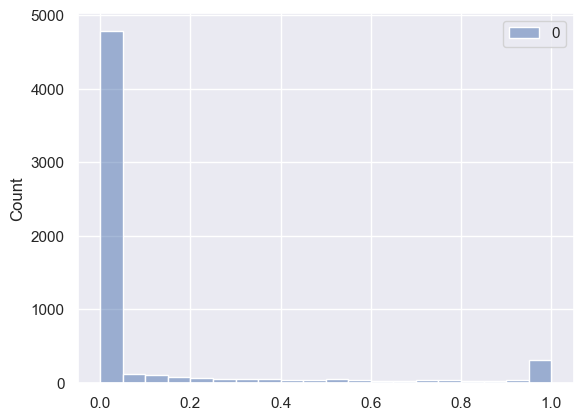

In [59]:
sns.histplot(qva, bins=20)

q <0.05で統計的な有意差があると仮定すると、5983遺伝子中4784遺伝子で有意差ありとなる。散布図を見れば結構な数の遺伝子に差があっても不思議では無いが、ちょっと多すぎる。<br />
これは、オミックス研究の検定ではよくあることであるが、大量にシーケンスしているためサンプルサイズが大きくなり（下のようにN=数百万）、少しのタグカウントの差でも統計的な有意差ありとみなされるためである。<br />
では、どうすれば良いか？

In [60]:
sum(rawtag.batch_1)

4565008

# 実際のRNA-Seqにおける統計的仮説検定

様々な分野において、統計的仮説検定は下記のように段階を踏んで高度化していく。<br />
- 一般的な統計的仮説検定（今回紹介した方法）を用いる段階
- 近隣分野の似たような問題で使われている検定手法を用いる段階（DNAマイクロアレイ解析からRNA-Seq解析、RNA-Seq解析からメタゲノム解析等）
- その問題に特化したモデル化を行い、確率モデルに基づいた検定手法を用いる段階<br /><br />
RNA-Seqにおける統計的仮説検定は、すでに第3段階に入りつつある。<br />
具体的には、個々の遺伝子の発現量の検定には、[DESeq2](http://www.ncbi.nlm.nih.gov/pubmed/25516281)や[edgeR](https://www.ncbi.nlm.nih.gov/pubmed/19910308)等のRNA-Seqの発現量比較に特化した検定手法が主に用いられるようになっている。<br />
両手法とも、RNA-Seqのリードのカウントデータの分布が、負の二項分布に従うという仮定による統計手法である。<br />
下記のように、RNA-Seqのリードのカウントデータの分布は、見た目上ポアソン分布に従うように見える。<br />

<AxesSubplot:xlabel='batch_1', ylabel='Count'>

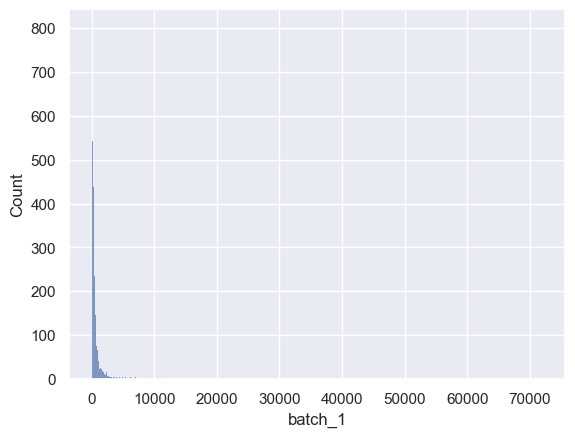

In [61]:
sns.histplot(rawtag.batch_1)

しかし、実際は分散が通常のポアソン分布よりも大きく、ポアソン分布に変数をもう一つ加えた、負の二項分布の方がより良いあてはめが可能であることが、経験的に知られている。実際の生物の細胞の遺伝子発現は、少数の極端に高発現な遺伝子と、大多数のほとんど発現していない遺伝子の集合である場合が多いためである。<br />
# GLMによる確率モデルの最尤推定
試しに、rawtag.batch_1のタグカウントデータを基に、ポアソン分布と負の二項分布をそれぞれ母集団の確率分布として仮定して、確率モデルを最尤推定してみる。<br />
なお、正規分布以外の線形モデルに基づく確率モデルをまとめて、一般化線形モデル（Generalized Linear Models）と呼ぶ。

In [62]:
model_pois = smf.glm("rawtag.batch_1 ~ 1", data = rawtag.batch_1, family=sm.families.Poisson()) #ポアソン分布を仮定したGLMでrawtag.batch_1をモデル化
# ~ 1は、モデル式の変数間の関係性について何も指定しないことを意味する。
res1 = model_pois.fit() #ポアソン分布はパラメータが1つあるので、そのパラメータをデータから最尤推定する
res1.summary() #モデルの最尤推定結果の要約

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         rawtag.batch_1   No. Observations:                 5983
Model:                            GLM   Df Residuals:                     5982
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.3923e+06
Date:                Wed, 14 Dec 2022   Deviance:                   1.0741e+07
Time:                        23:53:19   Pearson chi2:                 4.30e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6373      0.000   1.42e+04      0.000       6.636       6.638
==============================================================================
"""

In [63]:
model_negbinom = smf.glm("rawtag.batch_1 ~ 1", data = rawtag.batch_1, family=sm.families.NegativeBinomial()) #負の二項分布を仮定したGLMでrawtag.batch_1をモデル化
res2 = model_negbinom.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         rawtag.batch_1   No. Observations:                 5983
Model:                            GLM   Df Residuals:                     5982
Model Family:        NegativeBinomial   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45698.
Date:                Wed, 14 Dec 2022   Deviance:                       14492.
Time:                        23:53:24   Pearson chi2:                 5.62e+04
No. Iterations:                     6   Pseudo R-squ. (CS):          1.454e-14
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6373      0.013    513.054      0.000       6.612       6.663
==============================================================================
"""

# 情報量基準を用いたモデル選択
最尤推定した両確率モデルの、元データに対するモデルの良さを赤池情報量基準（AIC）を基準として数値化してみる。ポアソン分布はパラメータが1つ、負の二項分布がパラメータが2つだが、負の二項分布を仮定したモデルの方が、AICの値が小さく、rawtag.batch_1を表現するモデルとしては、より良いモデルと言える。


In [64]:
res1.aic

10784590.305050295

In [65]:
res2.aic

91397.21258440526

モデルの詳細とAIC等の情報量基準を同時に出力してくれるsummary2関数もある。

In [66]:
print(res1.summary2())
print(res2.summary2())

                Results: Generalized linear model
Model:              GLM              AIC:            10784590.3051
Link Function:      Log              BIC:            10689265.1615
Dependent Variable: rawtag.batch_1   Log-Likelihood: -5.3923e+06  
Date:               2022-12-14 23:53 LL-Null:        -5.3923e+06  
No. Observations:   5983             Deviance:       1.0741e+07   
Df Model:           0                Pearson chi2:   4.30e+07     
Df Residuals:       5982             Scale:          1.0000       
Method:             IRLS                                          
-------------------------------------------------------------------
               Coef.   Std.Err.      z       P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept      6.6373    0.0005  14181.0756  0.0000  6.6363  6.6382

               Results: Generalized linear model
Model:              GLM              AIC:            91397.2126 
Link Function:      Log    

# 発現量変動解析について
RNA-Seqデータの発現量変動解析（Differential Gene Expression)は、複数replicateの遺伝子ごとの発現量データをもとに、遺伝子の発現量とノイズをモデル化して、群間で何らかの指標でモデル間を比較し、遺伝子ごとに発現量の違いを検定する手法が主に用いられている。遺伝子ごとの発現量の指標としては、タグカウントが用いられることが多く、群間の比較には、何倍発現が変動したかの指標である、Log fold changeが使われる場合が多い。Salmonやkallisto等でのtranscriptごとのカウントデータの場合も、遺伝子ごとのタグカウントに集計し直して比較解析に用いられる。<br />
DESeq2, edgeR, DSS, BBSeq等多数手法は存在する。<br />
それぞれかなり特化した統計手法なため、手法の開発者が用いたプログラミング言語（R言語）以外ではほとんど実装されておらず、Pythonにも検証が十分にされて信頼できるライブラリは未だ存在しない。それらの検定手法を用いたい場合には、Rを用いることをお勧めする。<br />

# DESeq2について
ここでは、特に多くの研究で発現量変動解析に利用されている、DESeq2の手法について解説する。<br />

大前提として、DESeq2のアルゴリズムの詳細は、[DESeq2の論文](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8)を読むべきであり、DESeq2の具体的な使い方は、[DESeq2のチュートリアル](https://www.bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html)を読むべきである。<br />


DESeq2は、遺伝子ごとのタグカウントデータが負の二項分布に従っていると仮定して、遺伝子ごとにGLMで発現量の確率モデルを推定する。
そのモデルでは、replicate間の遺伝子のタグカウントのバラツキを、dispersion parameterとしてモデルに含める。<br />
一般的にRNA-Seqデータはreplicateの数、つまりはサンプルサイズが小さいことがほとんどなので、遺伝子ごとのタグカウントのバラツキが大きいことを前提とする。ただし、似たタグカウントの遺伝子間では、replicate間のタグカウントのバラツキも似ていると仮定する。<br />
最初に、遺伝子ごとにタグカウントのバラツキをreplicate間のバラツキを基に最尤法で推定する。<br />この際、replicate間の全リード数の違いも補正する。<br />
この推定結果から、平均的なタグカウントを遺伝子ごとに予測する。<br />
平均的なタグカウントから、その遺伝子のタグカウントのバラツキの圧縮具合を推定する。<br />

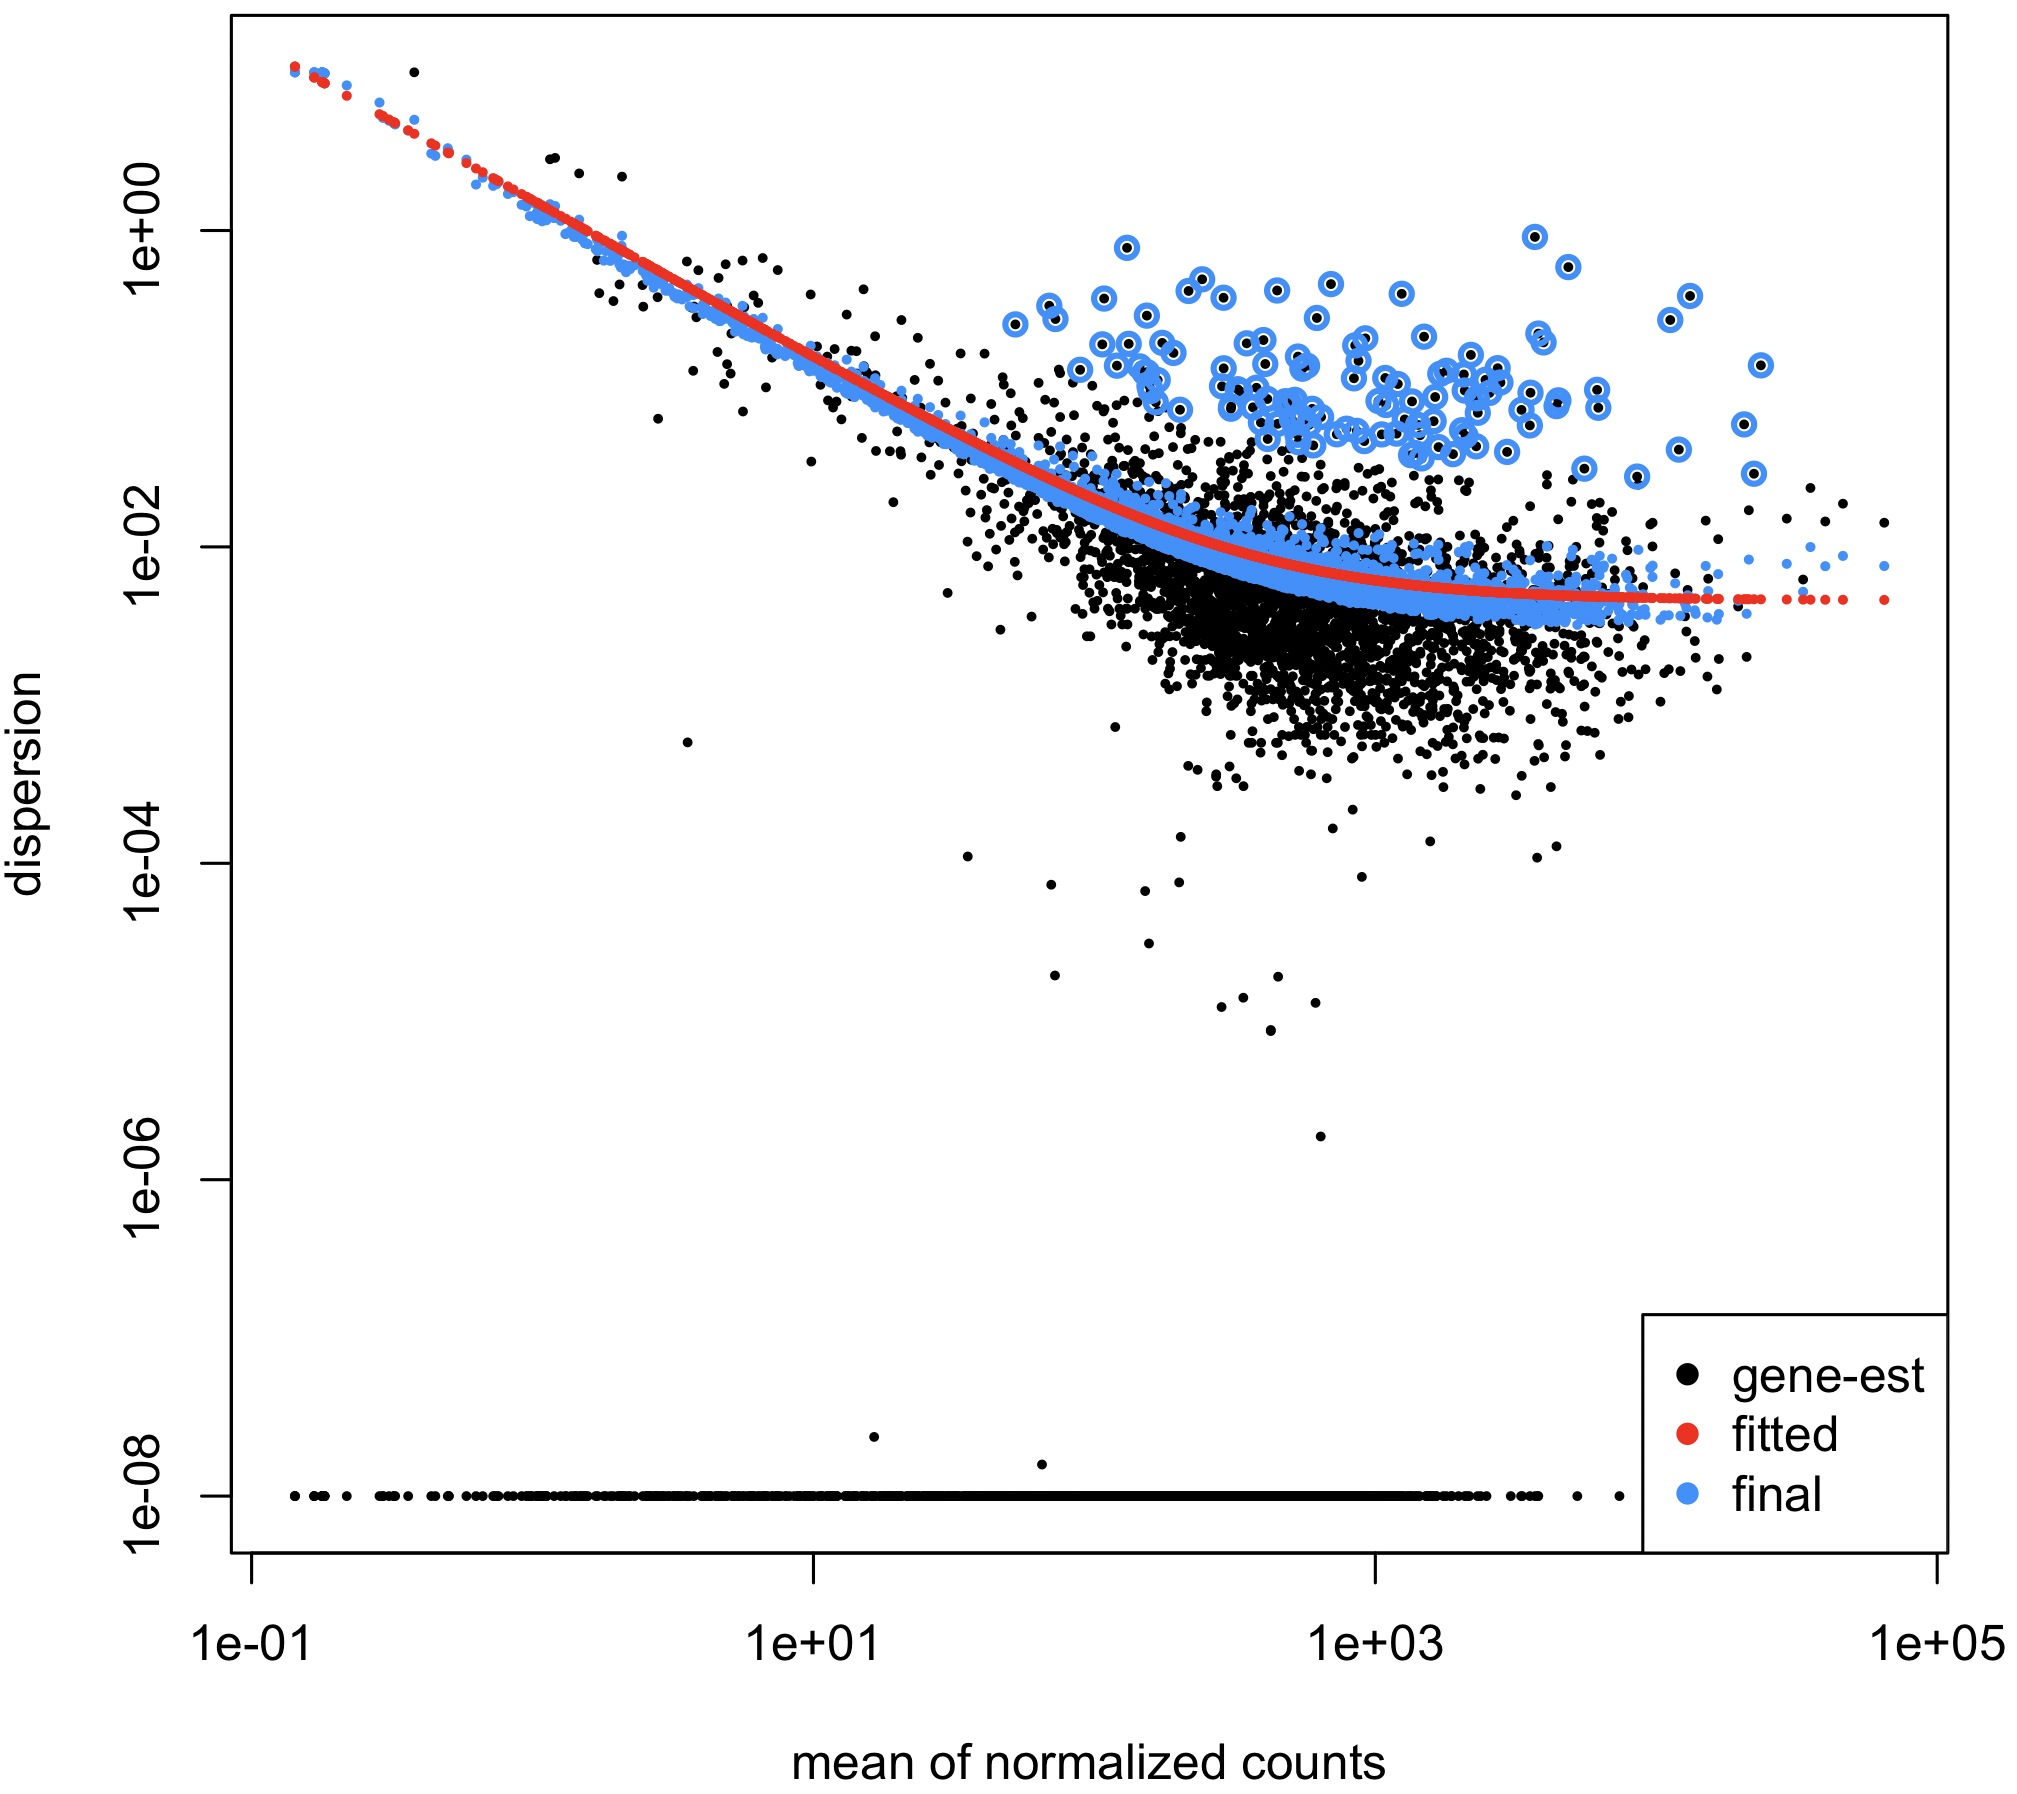

In [68]:
from IPython.display import Image, display_png
display_png(Image("DispersionPlot.png"))

上図は今回のデータの場合のタグカウントのバラツキの圧縮の例であり、黒点が最尤法で推定したその遺伝子のタグカウントのバラツキであり、青が平均タグカウントを基にして圧縮されたバラツキである。 <br />
ただし、元々の最尤法で推定したタグカウントのバラツキが、fitted curveよりも2SD以上だと、平均タグカウントを基にしたバラツキの圧縮は行わず、元々の最尤法で推定したその遺伝子のタグカウントのバラツキを用いる。<br />
<br />
edgeR等の他の発現量変動解析手法と比べて、DESeq2を特徴付けている工夫が、経験Bayes法を用いて、バラツキの圧縮の度合いを、自由度(サンプルサイズ-推定したいパラメータ数)によって変えることである。平均的なその遺伝子のタグカウントの数だけでなく、サンプルサイズも考慮してバラツキの圧縮具合を決める。サンプルサイズが大きければ、データから推定されるバラツキの信頼性は高いので、タグカウントのバラツキをあまり圧縮しない。<br />
<br />
ほとんど発現していない遺伝子は、例えばタグカウントが1か2で2倍量変動するので、一般的にfold changeとしては極端な値になりやすい。そのようなほとんど発現していない遺伝子は、たとえ統計的な有意差があったとしても、生物学的に意味があるとは考えにくい。そのため、一定以下の平均タグカウントの遺伝子はfold change推定に使用しないし、群間の検定にも使わない。<br />
<br />
また、regularized Log変換という、Log2変換の変形版を用いて、タグカウントの値を対数変換し、タグカウントの値が小さい遺伝子で発現量が群間で異なるとされやすくなる問題を軽減している。<br />
<br />
以上のような様々な工夫を行い、各群で各遺伝子の発現量のモデルをタグカウントデータからGLMで推定する。<br />
ここまではモデル推定であり、検定では無い。<br />
その後、群間で確率モデルを検定によって比較する。具体的には、群間でGLMの確率モデルの傾きの違いが0であると言えるか否かを、Wald検定や対数尤度比検定で検定する。<br />
下記の図は、Wald検定によって今回の2群間での発現量のlog fold changeと、その遺伝子の平均的なタグカウント、さらには統計的に有意差（FDR q <0.05）があった遺伝子（赤）の関係性を表したグラフである。<br />


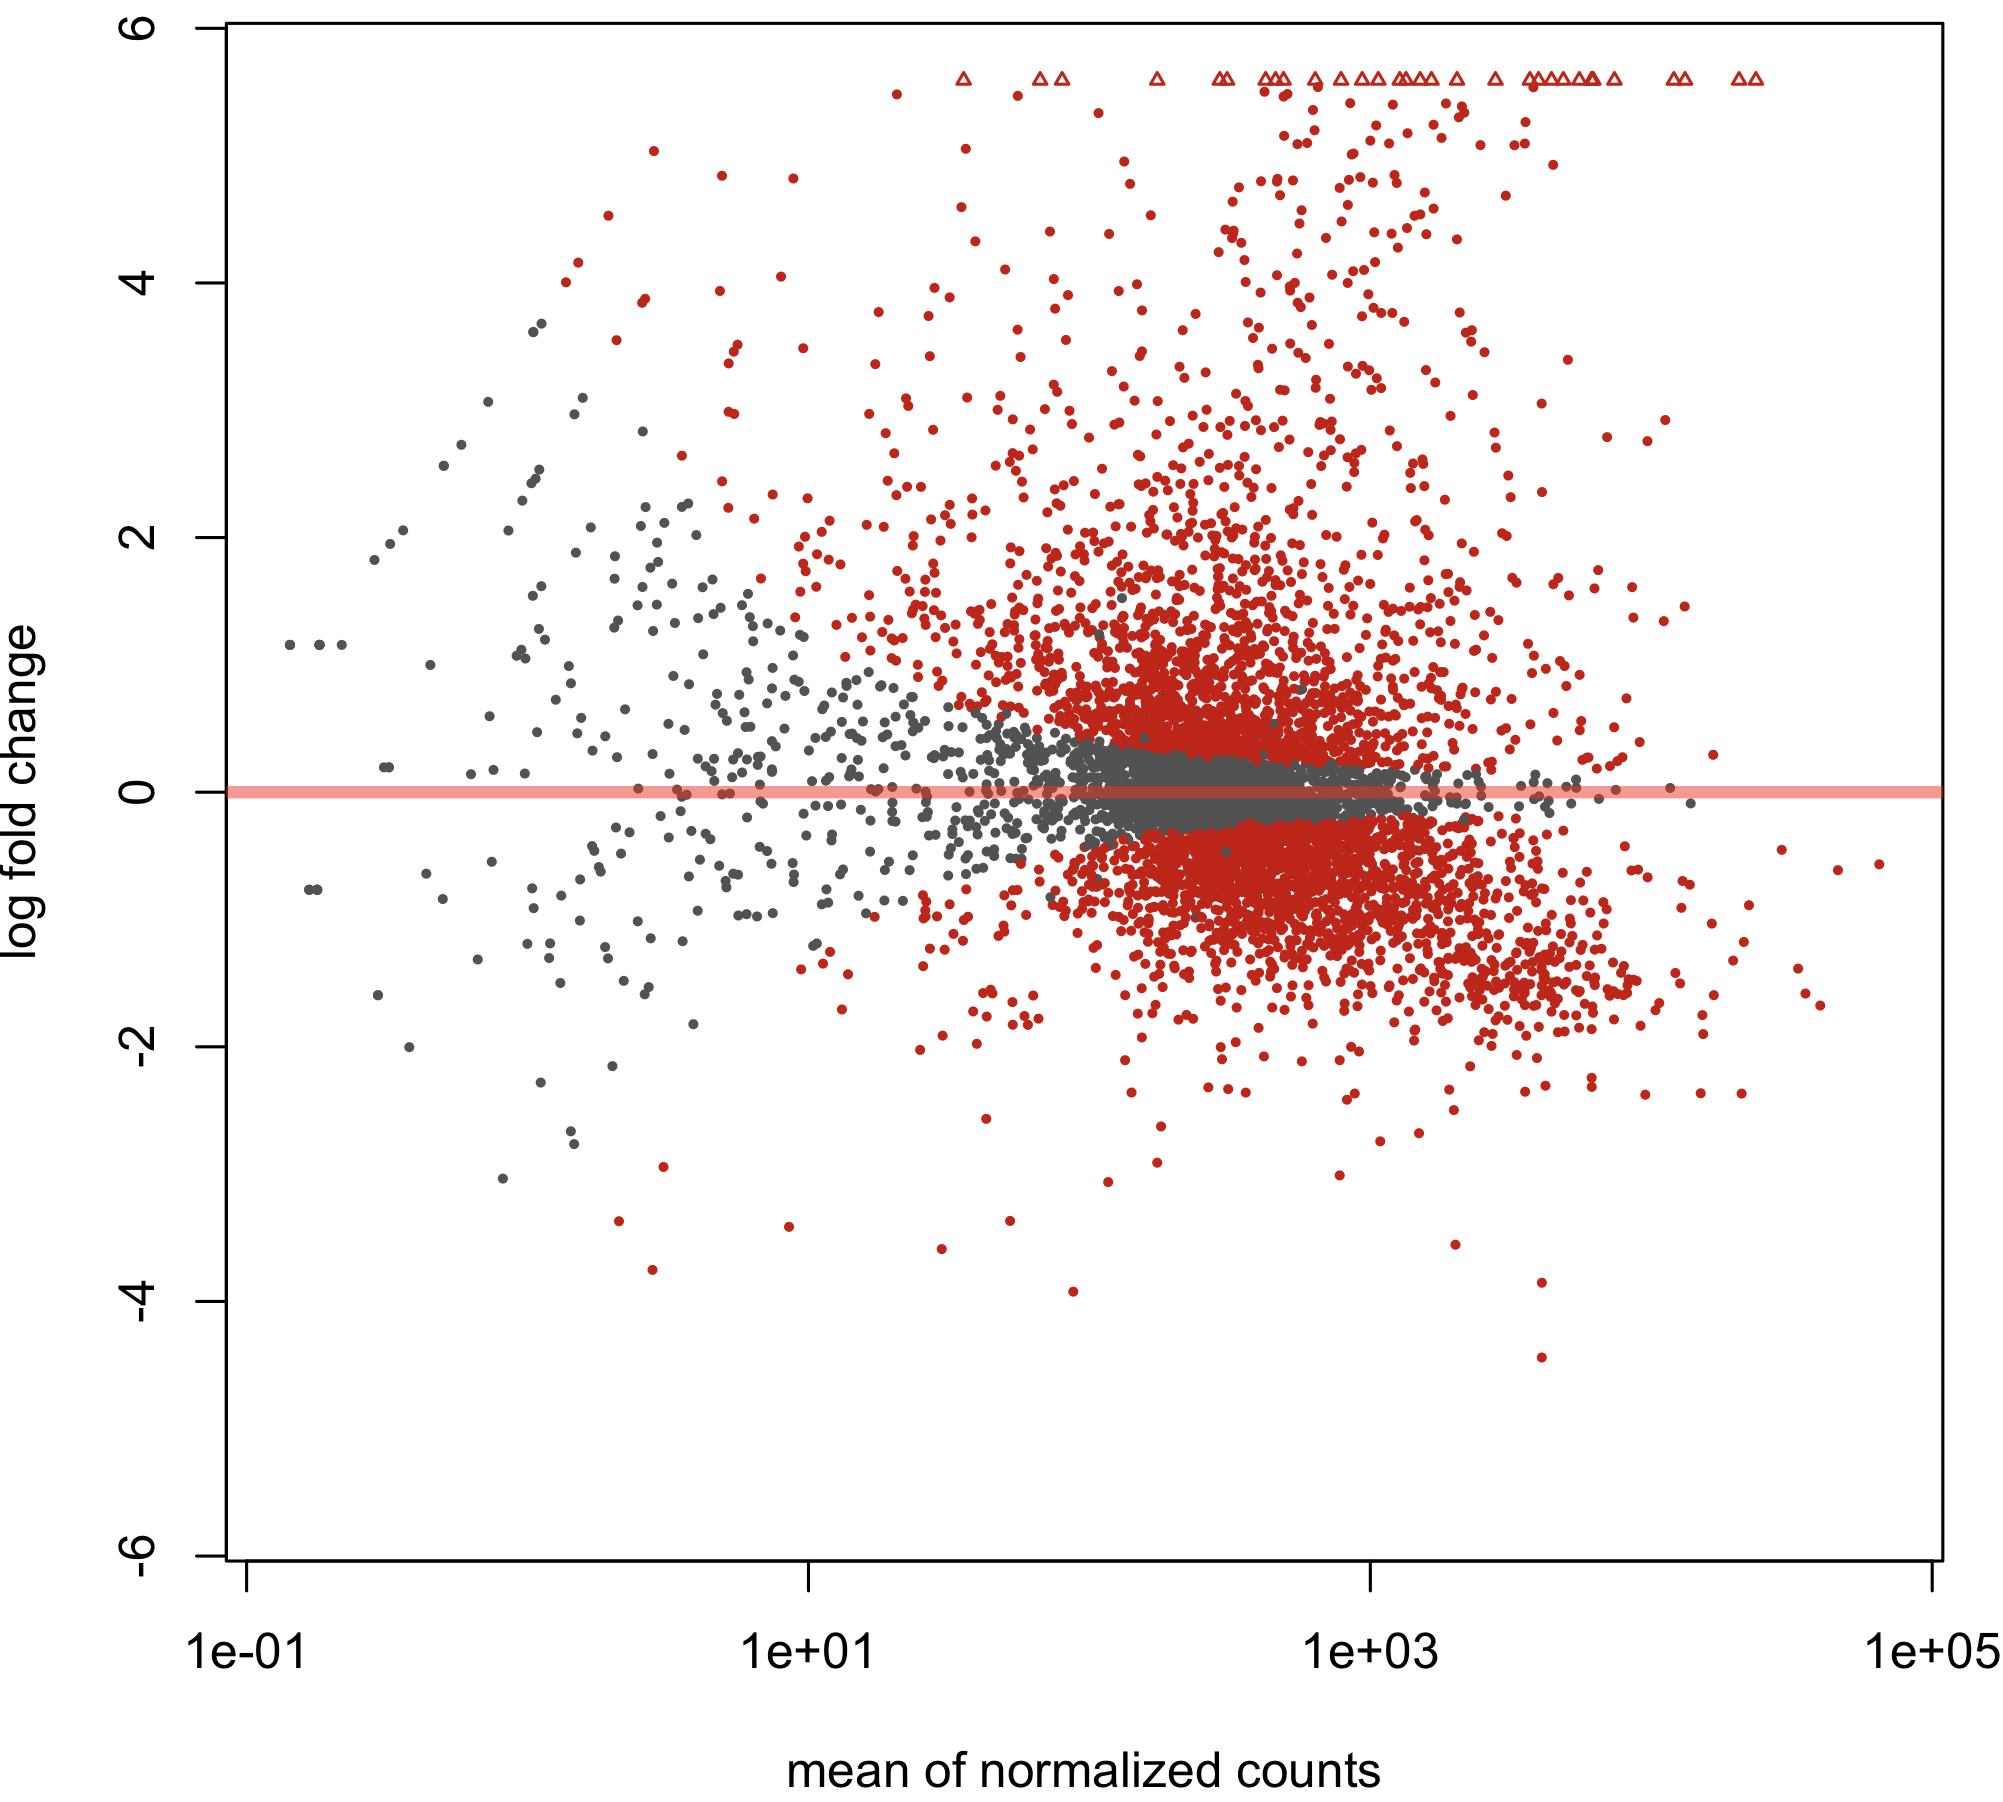

In [69]:
display_png(Image("MAPlotRes.png"))

replicateをpoolしたχ2乗検定でのFDR補正では、4784遺伝子が群間で有意差ありとなったが、<br />
DESeq2の場合、3880遺伝子が群間で有意差ありとなった。<br />
どちらの手法でも統計的な有意差ありとなった遺伝子の数は非常に多いが、DESeq2の方がreplicate間のバラツキのモデル化等を行なっているため、一般的により信頼性が高いと考えられる。<br />

